In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

In [2]:
# 🤖 Carregar os dados de vendas e concorrência da pasta correspondente
ventas_path = '../data/raw/treinamento/ventas.csv'
competencia_path = '../data/raw/treinamento/competencia.csv'

ventas = pd.read_csv(ventas_path)
competencia = pd.read_csv(competencia_path)

# Mostrar as primeiras linhas para verificar
print(ventas.head())
print(competencia.head())

        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2         84.93    169.86  
3         75.42    150.84  


In [3]:
# 🤖 Validação da qualidade dos dados para o dataframe vendas
informe = {}

# Tipos de variáveis
informe['tipos'] = ventas.dtypes.to_dict()

# Nulos por coluna
informe['nulos'] = ventas.isnull().sum().to_dict()

# Duplicados
informe['duplicados'] = ventas.duplicated().sum()

# Estatísticas descritivas
informe['descriptivo'] = ventas.describe(include='all').to_dict()

# Resumo final
print('--- RELATÓRIO DE QUALIDADE DE DADOS: vendas ---')
print('Tipos de variáveis:')
for k, v in informe['tipos'].items():
    print(f'  {k}: {v}')
print('\nNulos por coluna:')
for k, v in informe['nulos'].items():
    print(f'  {k}: {v}')
print(f"\nDuplicados: {informe['duplicados']}")
print('\nEstatísticas descritivas:')
for col, stats in informe['descriptivo'].items():
    print(f'  {col}:')
    for stat, value in stats.items():
        print(f'    {stat}: {value}')

--- RELATÓRIO DE QUALIDADE DE DADOS: vendas ---
Tipos de variáveis:
  fecha: object
  producto_id: object
  nombre: object
  categoria: object
  subcategoria: object
  precio_base: int64
  es_estrella: bool
  unidades_vendidas: int64
  precio_venta: float64
  ingresos: float64

Nulos por coluna:
  fecha: 0
  producto_id: 0
  nombre: 0
  categoria: 0
  subcategoria: 0
  precio_base: 0
  es_estrella: 0
  unidades_vendidas: 0
  precio_venta: 0
  ingresos: 0

Duplicados: 0

Estatísticas descritivas:
  fecha:
    count: 3552
    unique: 148
    top: 2021-10-25
    freq: 24
    mean: nan
    std: nan
    min: nan
    25%: nan
    50%: nan
    75%: nan
    max: nan
  producto_id:
    count: 3552
    unique: 24
    top: PROD_001
    freq: 148
    mean: nan
    std: nan
    min: nan
    25%: nan
    50%: nan
    75%: nan
    max: nan
  nombre:
    count: 3552
    unique: 24
    top: Nike Air Zoom Pegasus 40
    freq: 148
    mean: nan
    std: nan
    min: nan
    25%: nan
    50%: nan
    75%:

In [4]:
# 🤖 Validação da qualidade dos dados para o dataframe concorrência
informe_competencia = {}

# Tipos de variáveis
informe_competencia['tipos'] = competencia.dtypes.to_dict()

# Nulos por coluna
informe_competencia['nulos'] = competencia.isnull().sum().to_dict()

# Duplicados
informe_competencia['duplicados'] = competencia.duplicated().sum()

# Estatísticas descritivas
informe_competencia['descriptivo'] = competencia.describe(include='all').to_dict()

# Resumo final
print('--- RELATÓRIO DE QUALIDADE DE DADOS: concorrência ---')
print('Tipos de variáveis:')
for k, v in informe_competencia['tipos'].items():
    print(f'  {k}: {v}')
print('\nNulos por coluna:')
for k, v in informe_competencia['nulos'].items():
    print(f'  {k}: {v}')
print(f"\nDuplicados: {informe_competencia['duplicados']}")
print('\nEstatísticas descritivas:')
for col, stats in informe_competencia['descriptivo'].items():
    print(f'  {col}:')
    for stat, value in stats.items():
        print(f'    {stat}: {value}')

--- RELATÓRIO DE QUALIDADE DE DADOS: concorrência ---
Tipos de variáveis:
  fecha: object
  producto_id: object
  Amazon: float64
  Decathlon: float64
  Deporvillage: float64

Nulos por coluna:
  fecha: 0
  producto_id: 0
  Amazon: 0
  Decathlon: 0
  Deporvillage: 0

Duplicados: 0

Estatísticas descritivas:
  fecha:
    count: 3552
    unique: 148
    top: 2021-10-25
    freq: 24
    mean: nan
    std: nan
    min: nan
    25%: nan
    50%: nan
    75%: nan
    max: nan
  producto_id:
    count: 3552
    unique: 24
    top: PROD_001
    freq: 148
    mean: nan
    std: nan
    min: nan
    25%: nan
    50%: nan
    75%: nan
    max: nan
  Amazon:
    count: 3552.0
    unique: nan
    top: nan
    freq: nan
    mean: 118.62340723536035
    std: 156.09562829285224
    min: 16.85
    25%: 47.1175
    50%: 73.18
    75%: 114.3425
    max: 858.3499999999999
  Decathlon:
    count: 3552.0
    unique: nan
    top: nan
    freq: nan
    mean: 111.41218186936938
    std: 148.50813236369032
    

In [5]:
# 🤖 Converter a coluna 'fecha' para tipo datetime em ambos dataframes
ventas['fecha'] = pd.to_datetime(ventas['fecha'])
competencia['fecha'] = pd.to_datetime(competencia['fecha'])

# Verificar a alteração
def verificar_fecha(df, nome):
    print(f"{nome} - tipo de 'fecha':", df['fecha'].dtype)
    print(df['fecha'].head())

verificar_fecha(ventas, 'vendas')
verificar_fecha(competencia, 'concorrência')

vendas - tipo de 'fecha': datetime64[ns]
0   2021-10-25
1   2021-10-25
2   2021-10-25
3   2021-10-25
4   2021-10-25
Name: fecha, dtype: datetime64[ns]
concorrência - tipo de 'fecha': datetime64[ns]
0   2021-10-25
1   2021-10-25
2   2021-10-25
3   2021-10-25
4   2021-10-25
Name: fecha, dtype: datetime64[ns]


In [6]:
# 🤖 Integrar vendas e concorrência em um único dataframe usando fecha e producto_id como chaves

df = pd.merge(ventas, competencia, on=['fecha', 'producto_id'], how='inner')

# Mostrar as primeiras linhas do novo dataframe integrado
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


# 🤖 Análise exploratória completa do dataframe integrado `df`
A seguir são apresentados diferentes análises e visualizações para entender melhor os dados de vendas e concorrência.

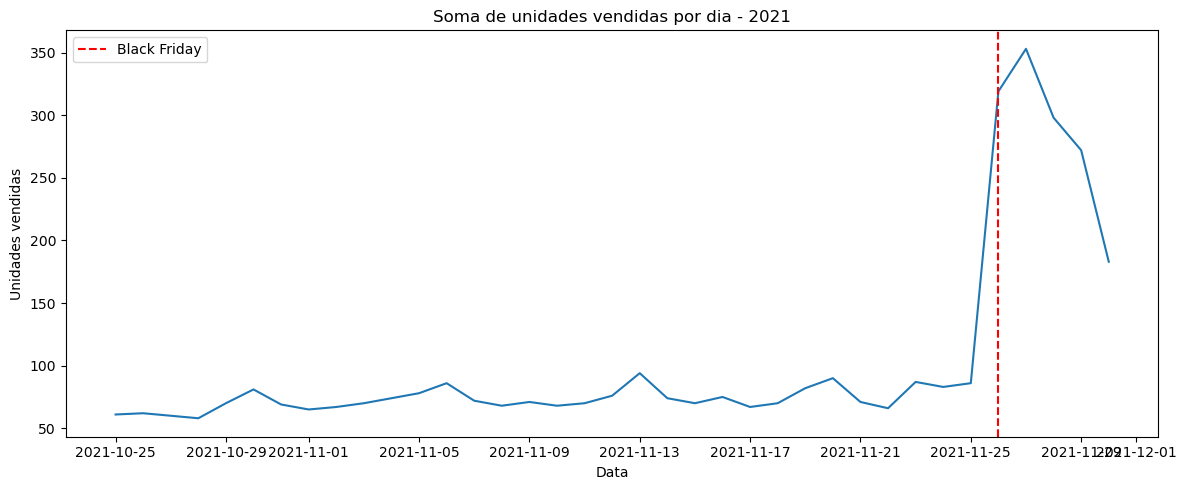

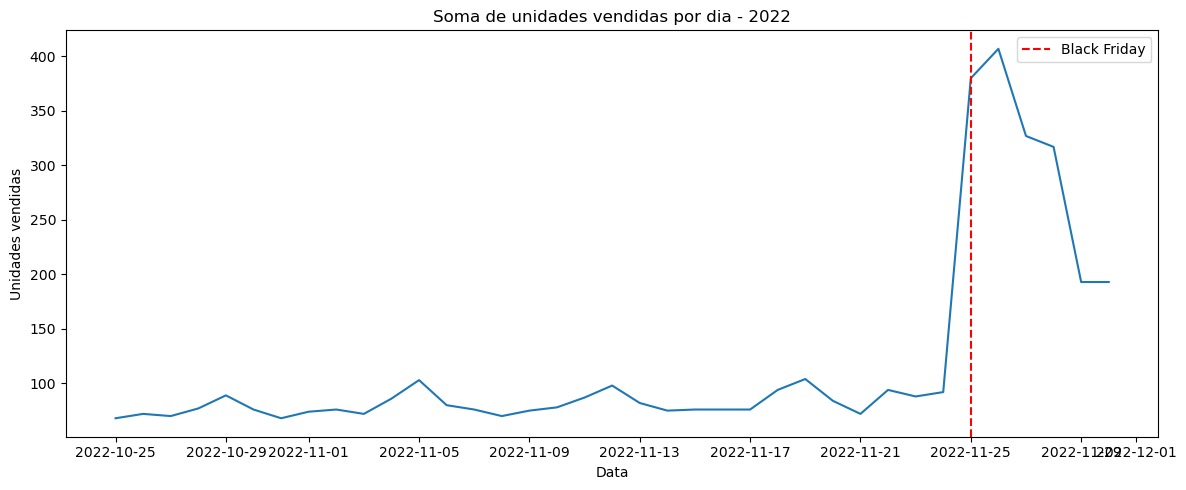

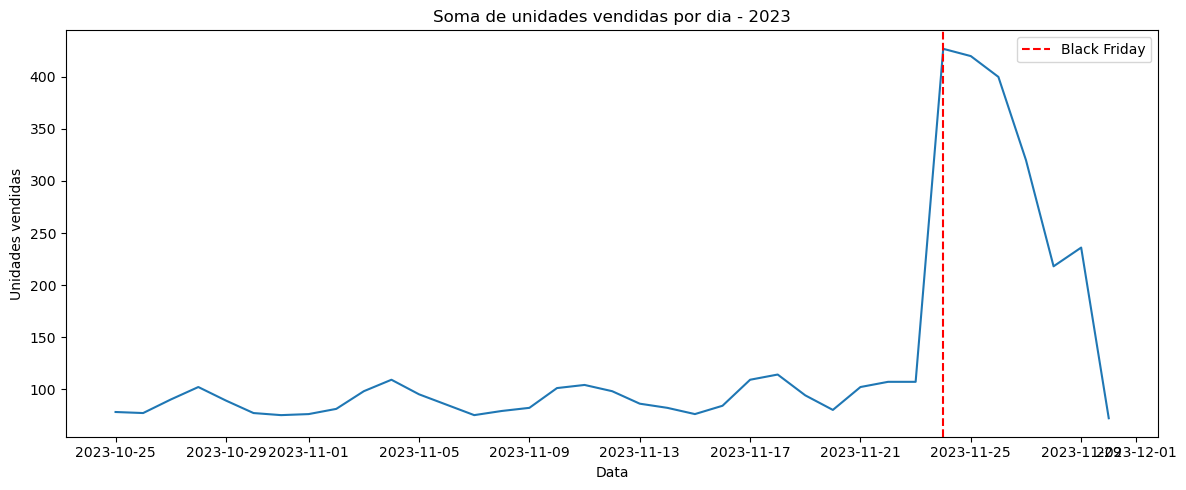

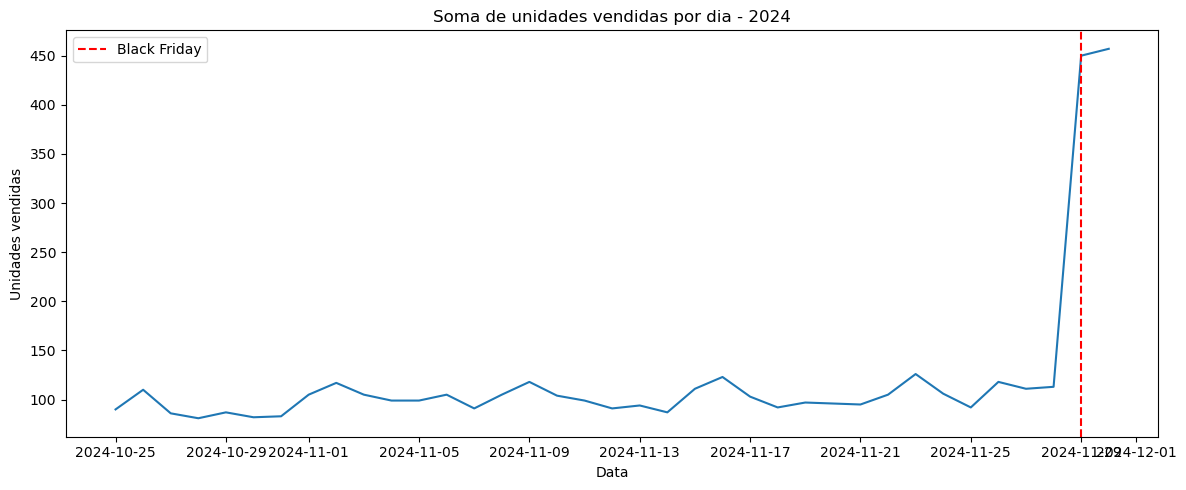

In [7]:
# Gráfico de linhas temporais por ano com soma de unidades vendidas e marcando Black Fridays
import matplotlib.dates as mdates
from datetime import datetime

# Identificar anos presentes
anos = df['fecha'].dt.year.unique()
black_fridays = []
for ano in anos:
    # Black Friday: último sexta-feira de novembro
    nov = df[(df['fecha'].dt.year == ano) & (df['fecha'].dt.month == 11)]
    sextas = nov[nov['fecha'].dt.weekday == 4]
    if not sextas.empty:
        black_friday = sextas['fecha'].max()
        black_fridays.append(black_friday)

for ano in sorted(anos):
    plt.figure(figsize=(12,5))
    dados_ano = df[df['fecha'].dt.year == ano].groupby('fecha')['unidades_vendidas'].sum().reset_index()
    sns.lineplot(data=dados_ano, x='fecha', y='unidades_vendidas')
    plt.title(f'Soma de unidades vendidas por dia - {ano}')
    plt.xlabel('Data')
    plt.ylabel('Unidades vendidas')
    # Marcar Black Friday
    bf = [bf for bf in black_fridays if bf.year == ano]
    for data_bf in bf:
        plt.axvline(data_bf, color='red', linestyle='--', label='Black Friday')
    plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\gemlopez\AppData\Local\Temp\ipykernel_14604\2227030930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('dia_semana')['unidades_vendidas'].sum().reindex(dias_ordem).reset_index(),


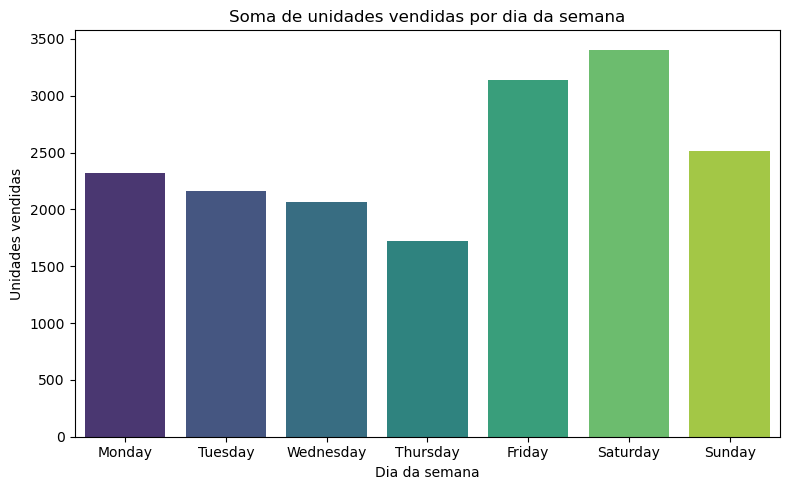

In [8]:
# Gráfico da soma de unidades vendidas por dia da semana
plt.figure(figsize=(8,5))
df['dia_semana'] = df['fecha'].dt.day_name()
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df.groupby('dia_semana')['unidades_vendidas'].sum().reindex(dias_ordem).reset_index(),
            x='dia_semana', y='unidades_vendidas', palette='viridis')
plt.title('Soma de unidades vendidas por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()

C:\Users\gemlopez\AppData\Local\Temp\ipykernel_14604\2246390525.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categorias, x='categoria', y='unidades_vendidas', palette='mako')


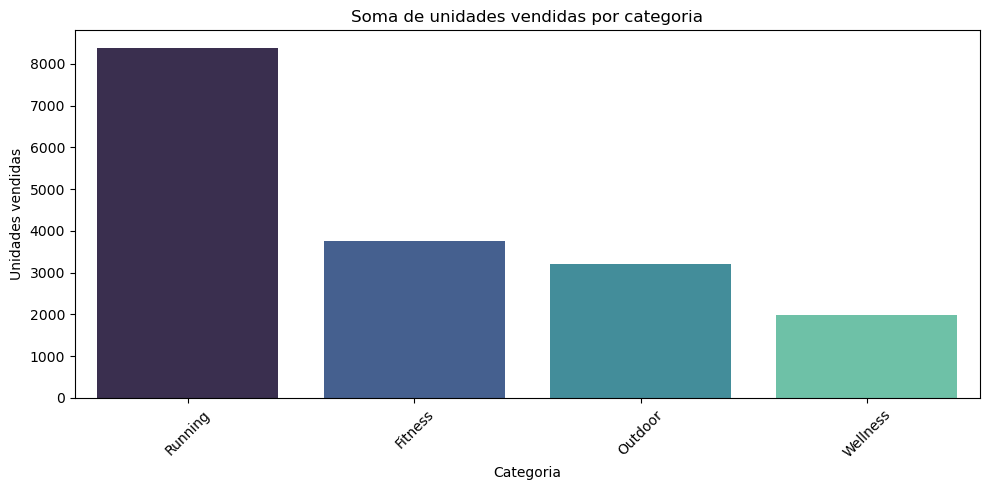

In [9]:
# Gráfico da soma de unidades vendidas por categoria
plt.figure(figsize=(10,5))
categorias = df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=categorias, x='categoria', y='unidades_vendidas', palette='mako')
plt.title('Soma de unidades vendidas por categoria')
plt.xlabel('Categoria')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gemlopez\AppData\Local\Temp\ipykernel_14604\4049837525.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcategorias, x='subcategoria', y='unidades_vendidas', palette='crest')


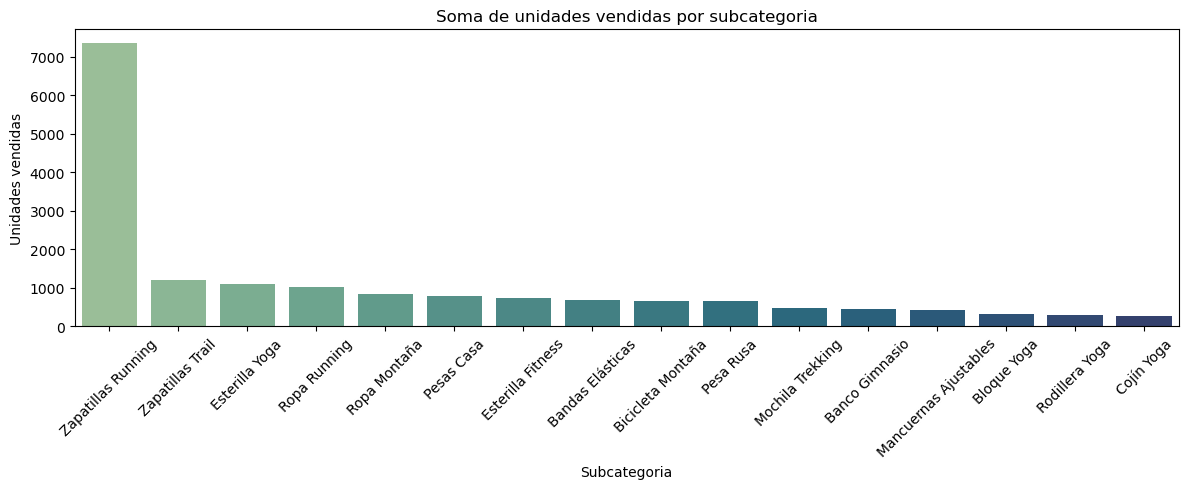

In [10]:
# Gráfico da soma de unidades vendidas por subcategoria
plt.figure(figsize=(12,5))
subcategorias = df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=subcategorias, x='subcategoria', y='unidades_vendidas', palette='crest')
plt.title('Soma de unidades vendidas por subcategoria')
plt.xlabel('Subcategoria')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gemlopez\AppData\Local\Temp\ipykernel_14604\4202875587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_produtos, x='nombre', y='unidades_vendidas', palette='rocket')


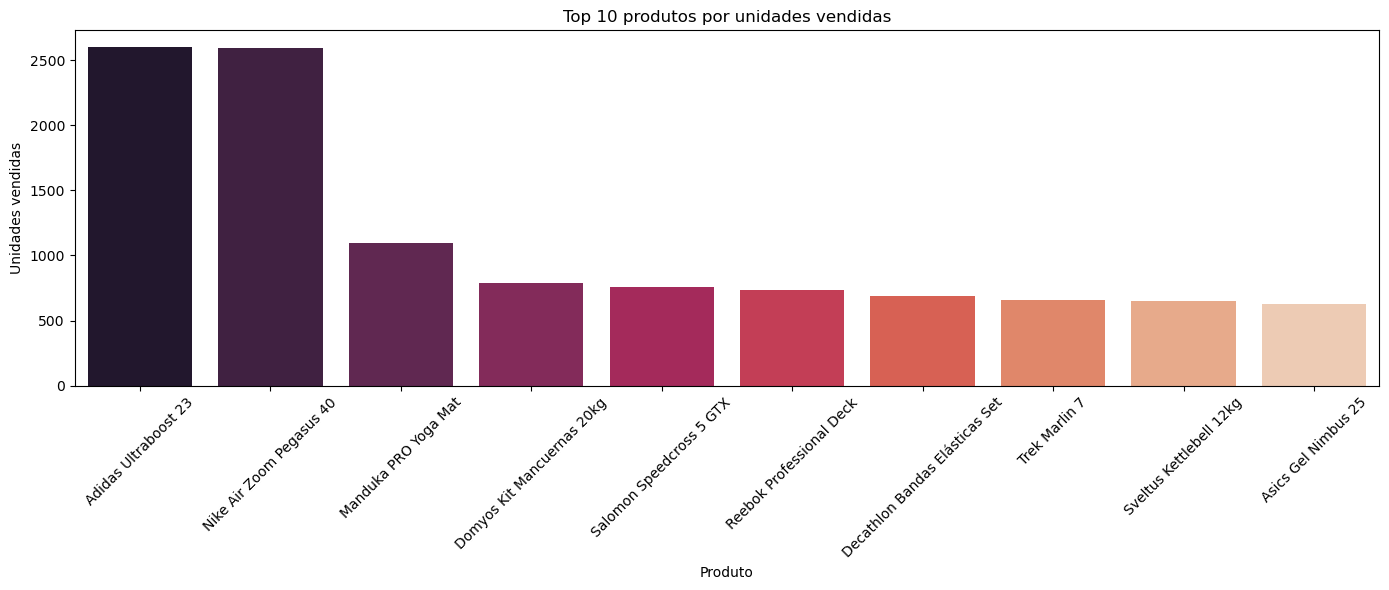

In [11]:
# Gráfico dos principais produtos por unidades vendidas
plt.figure(figsize=(14,6))
top_produtos = df.groupby(['producto_id','nombre'])['unidades_vendidas'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_produtos, x='nombre', y='unidades_vendidas', palette='rocket')
plt.title('Top 10 produtos por unidades vendidas')
plt.xlabel('Produto')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

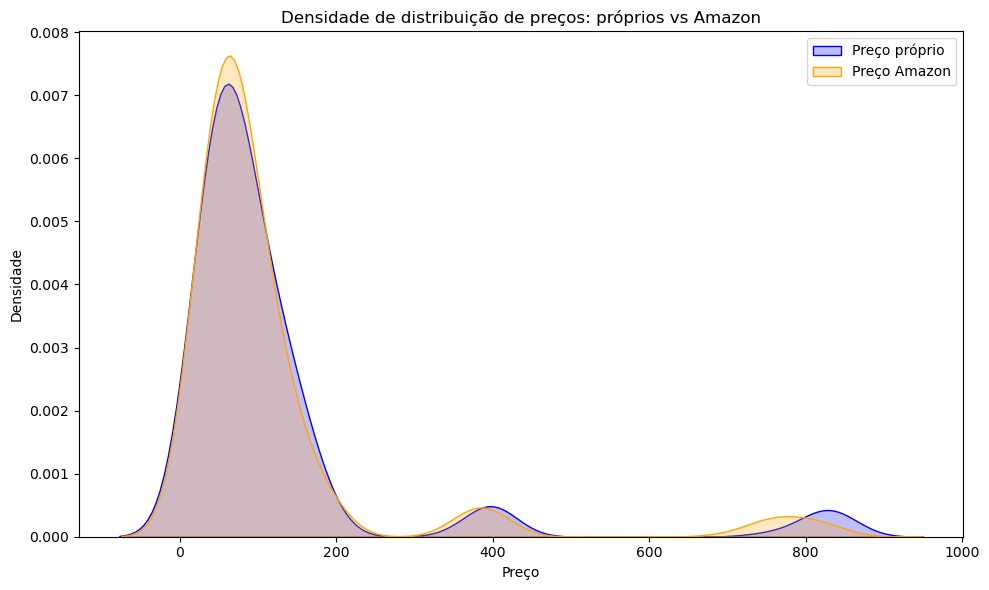

In [12]:
# Gráfico de densidade de distribuição de preços próprios e da Amazon
plt.figure(figsize=(10,6))
sns.kdeplot(df['precio_venta'], label='Preço próprio', fill=True, color='blue')
sns.kdeplot(df['Amazon'], label='Preço Amazon', fill=True, color='orange')
plt.title('Densidade de distribuição de preços: próprios vs Amazon')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# 🤖 Criação de variáveis temporais e de calendário usando holidays para o Brasil

# Variáveis temporais básicas
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.dayofweek  # 0=Segunda, 6=Domingo
df['nombre_dia_semana'] = df['fecha'].dt.day_name()
df['nombre_mes'] = df['fecha'].dt.month_name()

# Feriados no Brasil
br_holidays = holidays.Brazil(years=df['año'].unique())
df['es_festivo'] = df['fecha'].isin(br_holidays)

# Black Friday: última sexta-feira de novembro
def es_black_friday(fecha):
    if fecha.month == 11:
        # Última sexta-feira de novembro
        ultima_sexta = max([d for d in pd.date_range(start=f'{fecha.year}-11-01', end=f'{fecha.year}-11-30') if d.weekday() == 4])
        return fecha == ultima_sexta
    return False
df['es_black_friday'] = df['fecha'].apply(es_black_friday)

# Cyber Monday: primeira segunda-feira após Black Friday
def es_cyber_monday(fecha):
    if fecha.month == 11 or fecha.month == 12:
        # Black Friday daquele ano
        ultima_sexta = max([d for d in pd.date_range(start=f'{fecha.year}-11-01', end=f'{fecha.year}-11-30') if d.weekday() == 4])
        primeira_segunda = ultima_sexta + pd.Timedelta(days=(7 - ultima_sexta.weekday()))
        return fecha == primeira_segunda
    return False
df['es_cyber_monday'] = df['fecha'].apply(es_cyber_monday)

# Variável: semana do ano
df['semana_año'] = df['fecha'].dt.isocalendar().week

# Variável: trimestre
df['trimestre'] = df['fecha'].dt.quarter

# Variável: fim de semana
df['es_fin_semana'] = df['dia_semana'].isin([5,6])

# Mostrar as primeiras linhas para verificar
print(df[['fecha','año','mes','dia_mes','nombre_dia_semana','es_festivo','es_black_friday','es_cyber_monday','semana_año','trimestre','es_fin_semana']].head())

C:\Users\gemlopez\AppData\Local\Temp\ipykernel_14604\4109392872.py:13: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['es_festivo'] = df['fecha'].isin(br_holidays)


       fecha   año  mes  dia_mes nombre_dia_semana  es_festivo  \
0 2021-10-25  2021   10       25            Monday       False   
1 2021-10-25  2021   10       25            Monday       False   
2 2021-10-25  2021   10       25            Monday       False   
3 2021-10-25  2021   10       25            Monday       False   
4 2021-10-25  2021   10       25            Monday       False   

   es_black_friday  es_cyber_monday  semana_año  trimestre  es_fin_semana  
0            False            False          43          4          False  
1            False            False          43          4          False  
2            False            False          43          4          False  
3            False            False          43          4          False  
4            False            False          43          4          False  


In [14]:
# 🤖 Criação de variáveis de lag e média móvel de 7 dias para unidades vendidas, por ano
lags = range(1, 8)

def criar_lags_media(df):
    df = df.sort_values(['producto_id', 'fecha'])
    for lag in lags:
        df[f'unidades_vendidas_lag{lag}'] = df.groupby(['producto_id', 'año'])['unidades_vendidas'].shift(lag)
    df['unidades_vendidas_mm7'] = df.groupby(['producto_id', 'año'])['unidades_vendidas'].transform(lambda x: x.rolling(7).mean())
    return df

# Aplicar a função
df = criar_lags_media(df)

# Remover registros com nulos nas novas variáveis
cols_lag_mm = [f'unidades_vendidas_lag{lag}' for lag in lags] + ['unidades_vendidas_mm7']
df = df.dropna(subset=cols_lag_mm)

# Mostrar as primeiras linhas para verificar
print(df[['fecha','producto_id','unidades_vendidas'] + cols_lag_mm].head(10))

         fecha producto_id  unidades_vendidas  unidades_vendidas_lag1  \
168 2021-11-01    PROD_001                  7                     9.0   
192 2021-11-02    PROD_001                 10                     7.0   
216 2021-11-03    PROD_001                 11                    10.0   
240 2021-11-04    PROD_001                 12                    11.0   
264 2021-11-05    PROD_001                 10                    12.0   
288 2021-11-06    PROD_001                 10                    10.0   
312 2021-11-07    PROD_001                 10                    10.0   
336 2021-11-08    PROD_001                  9                    10.0   
360 2021-11-09    PROD_001                 11                     9.0   
384 2021-11-10    PROD_001                 10                    11.0   

     unidades_vendidas_lag2  unidades_vendidas_lag3  unidades_vendidas_lag4  \
168                    12.0                    12.0                     7.0   
192                     9.0           

In [15]:
# 🤖 Criar variável de percentual de desconto

df['descuento_porcentaje'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100

# Mostrar as primeiras linhas para verificar
print(df[['fecha','producto_id','precio_base','precio_venta','descuento_porcentaje']].head(10))

         fecha producto_id  precio_base  precio_venta  descuento_porcentaje
168 2021-11-01    PROD_001          115        115.07              0.060870
192 2021-11-02    PROD_001          115        116.10              0.956522
216 2021-11-03    PROD_001          115        114.58             -0.365217
240 2021-11-04    PROD_001          115        112.23             -2.408696
264 2021-11-05    PROD_001          115        113.81             -1.034783
288 2021-11-06    PROD_001          115        117.80              2.434783
312 2021-11-07    PROD_001          115        116.04              0.904348
336 2021-11-08    PROD_001          115        113.46             -1.339130
360 2021-11-09    PROD_001          115        113.98             -0.886957
384 2021-11-10    PROD_001          115        117.57              2.234783


In [16]:
# 🤖 Criar variável preco_concorrente e ratio_preco, e remover variáveis de concorrentes

# Só criar se existirem as colunas
compet_cols = [col for col in ['Amazon', 'Decathlon', 'Deporvillage'] if col in df.columns]
if compet_cols:
    df['precio_competencia'] = df[compet_cols].mean(axis=1)
    df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']
    df = df.drop(columns=compet_cols)
else:
    print('As colunas de concorrentes já foram removidas ou não existem.')

# Mostrar as primeiras linhas para verificar
print(df[['fecha','producto_id','precio_venta','precio_competencia','ratio_precio']].head(10))

         fecha producto_id  precio_venta  precio_competencia  ratio_precio
168 2021-11-01    PROD_001        115.07           95.353333      1.206775
192 2021-11-02    PROD_001        116.10           96.153333      1.207446
216 2021-11-03    PROD_001        114.58           95.240000      1.203066
240 2021-11-04    PROD_001        112.23           96.590000      1.161922
264 2021-11-05    PROD_001        113.81           96.170000      1.183425
288 2021-11-06    PROD_001        117.80           95.436667      1.234326
312 2021-11-07    PROD_001        116.04           96.153333      1.206822
336 2021-11-08    PROD_001        113.46           97.003333      1.169651
360 2021-11-09    PROD_001        113.98           96.933333      1.175860
384 2021-11-10    PROD_001        117.57           96.343333      1.220323


In [17]:
# 🤖 Criar cópia das variáveis categóricas com sufixo _h e aplicar one hot encoding

df['nombre_h'] = df['nombre']
df['categoria_h'] = df['categoria']
df['subcategoria_h'] = df['subcategoria']

# One hot encoding
categoricas = ['nombre_h', 'categoria_h', 'subcategoria_h']
df = pd.get_dummies(df, columns=categoricas, drop_first=False)

# Mostrar as primeiras colunas para verificar
print(df.filter(regex='_h').head())

     nombre_h_Adidas Own The Run Jacket  nombre_h_Adidas Ultraboost 23  \
168                               False                          False   
192                               False                          False   
216                               False                          False   
240                               False                          False   
264                               False                          False   

     nombre_h_Asics Gel Nimbus 25  nombre_h_Bowflex SelectTech 552  \
168                         False                            False   
192                         False                            False   
216                         False                            False   
240                         False                            False   
264                         False                            False   

     nombre_h_Columbia Silver Ridge  nombre_h_Decathlon Bandas Elásticas Set  \
168                           False                   

In [18]:
# 🤖 Salvar o dataframe df na pasta data/processed como df.csv

df.to_csv('../data/processed/df.csv', index=False)
print('Arquivo salvo em ../data/processed/df.csv')

Arquivo salvo em ../data/processed/df.csv


In [19]:
# 🤖 Dividir df em train_df (2021-2023) e validation_df (2024) e mostrar o número de registros

train_df = df[df['año'].isin([2021, 2022, 2023])].copy()
validation_df = df[df['año'] == 2024].copy()

print(f'Registros em train_df: {len(train_df)}')
print(f'Registros em validation_df: {len(validation_df)}')

Registros em train_df: 2160
Registros em validation_df: 720


In [20]:
# 🤖 Treinamento e validação do HistGradientBoostingRegressor com parâmetros conservadores
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seleção de variáveis preditoras
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
excluir += list(train_df.select_dtypes(include=['object']).columns)
X_train = train_df.drop(columns=excluir)
y_train = train_df['unidades_vendidas']
X_val = validation_df.drop(columns=excluir)
y_val = validation_df['unidades_vendidas']

# Modelo conservador
model = HistGradientBoostingRegressor(
    learning_rate=0.03,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_val)

# Baseline ingênuo: prediz a média do train
y_naive = [y_train.mean()] * len(y_val)

# Métricas
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

mae_naive = mean_absolute_error(y_val, y_naive)
mse_naive = mean_squared_error(y_val, y_naive)
rmse_naive = np.sqrt(mse_naive)
r2_naive = r2_score(y_val, y_naive)

print('--- Métricas HistGradientBoostingRegressor ---')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print('\n--- Métricas Baseline Ingênuo (média) ---')
print(f'MAE: {mae_naive:.2f}')
print(f'MSE: {mse_naive:.2f}')
print(f'RMSE: {rmse_naive:.2f}')
print(f'R2: {r2_naive:.2f}')

--- Métricas HistGradientBoostingRegressor ---
MAE: 0.75
MSE: 2.21
RMSE: 1.49
R2: 0.95

--- Métricas Baseline Ingênuo (média) ---
MAE: 3.67
MSE: 44.79
RMSE: 6.69
R2: -0.00


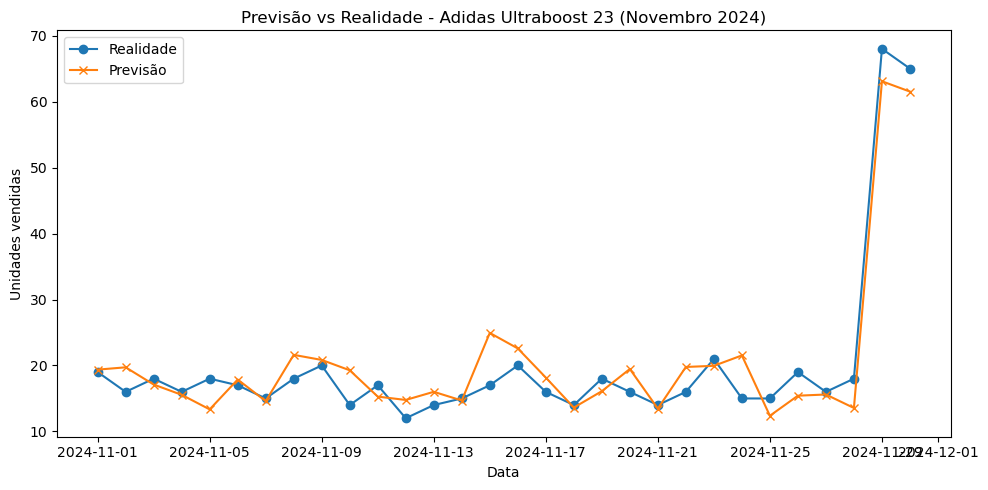

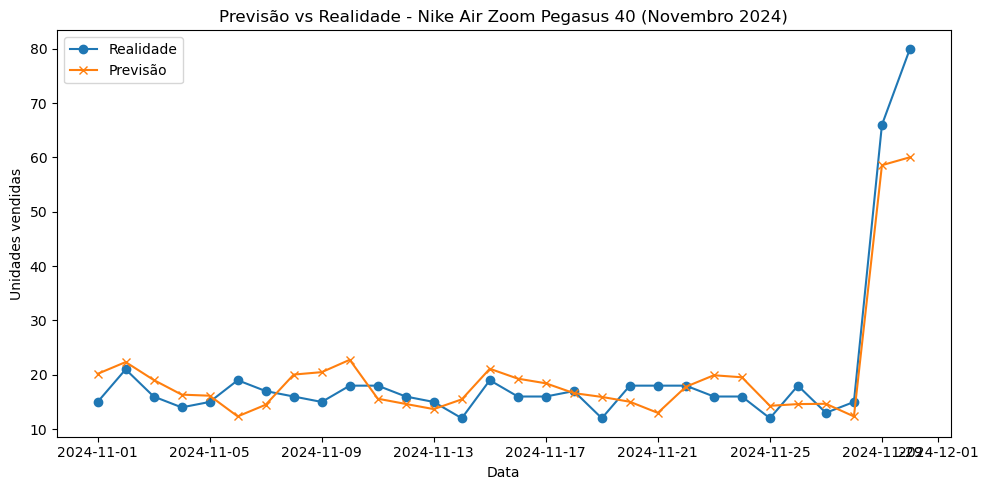

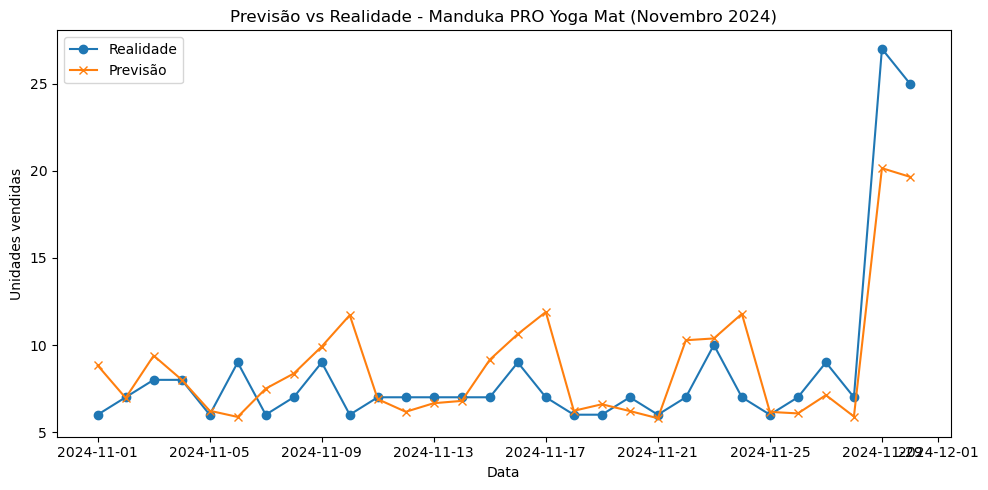

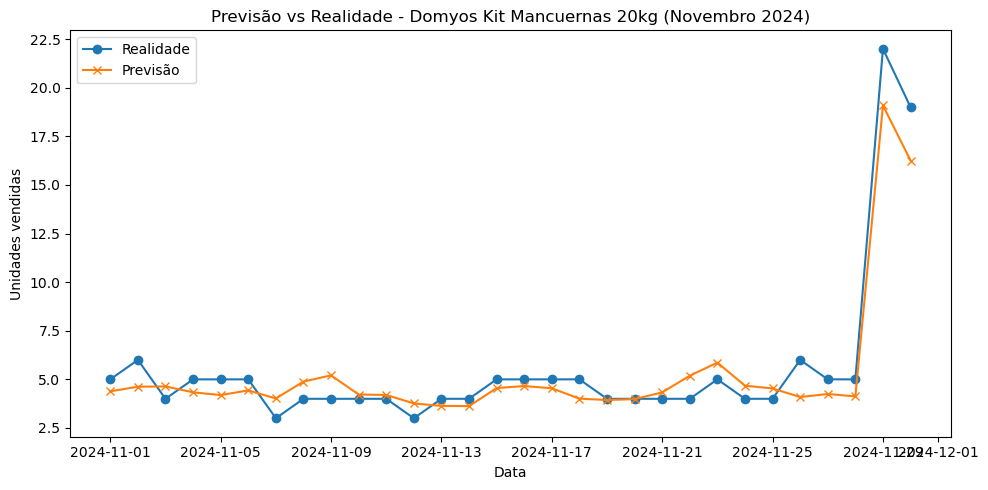

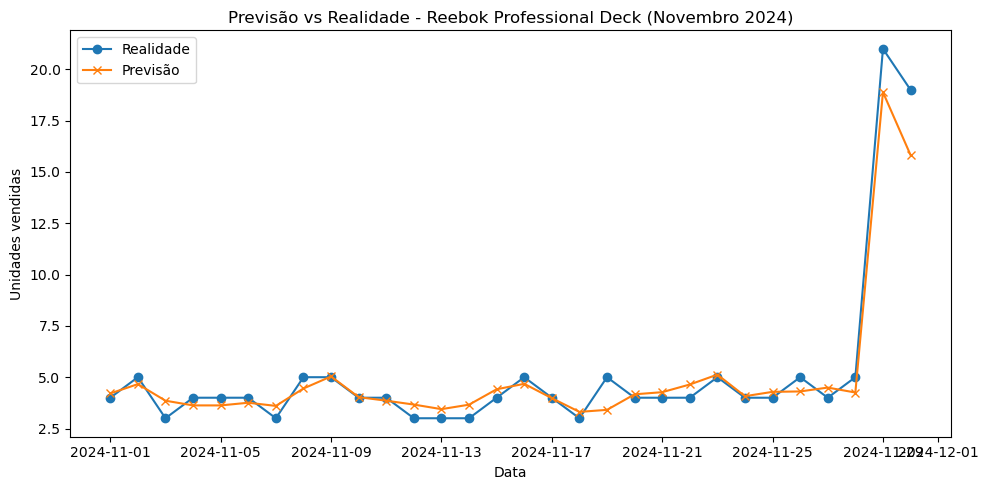

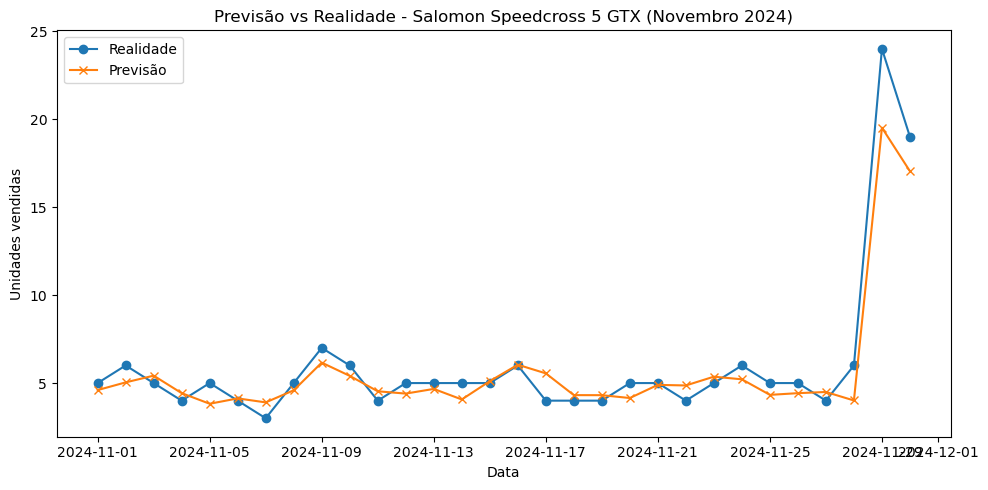

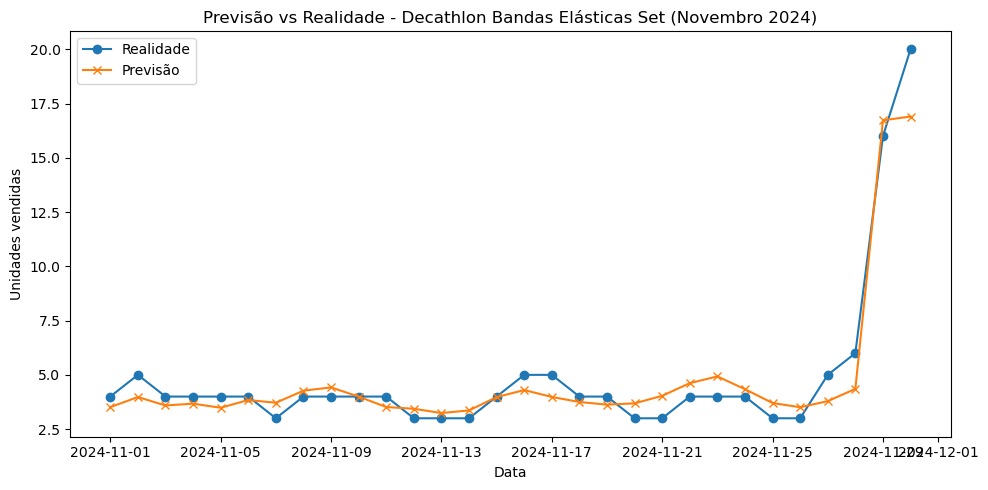

In [21]:
# 🤖 Previsão e visualização para os 7 produtos estrela em novembro de 2024
import matplotlib.pyplot as plt

# Filtrar novembro de 2024
nov_2024 = validation_df[(validation_df['año'] == 2024) & (validation_df['mes'] == 11)].copy()

# Identificar os 7 produtos estrela por vendas totais em train_df
produtos_top = train_df.groupby('producto_id')['unidades_vendidas'].sum().sort_values(ascending=False).head(7).index.tolist()

# Obter nomes dos produtos
nomes_produtos = train_df.set_index('producto_id')['nombre'].to_dict()

# Variáveis preditoras
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
excluir += list(train_df.select_dtypes(include=['object']).columns)
X_nov = nov_2024.drop(columns=excluir)

# Prever para novembro de 2024
nov_2024['prediccion'] = model.predict(X_nov)

# Plotar para cada produto estrela
for prod_id in produtos_top:
    dados = nov_2024[nov_2024['producto_id'] == prod_id]
    nome = nomes_produtos.get(prod_id, f'Produto {prod_id}')
    plt.figure(figsize=(10,5))
    plt.plot(dados['fecha'], dados['unidades_vendidas'], label='Realidade', marker='o')
    plt.plot(dados['fecha'], dados['prediccion'], label='Previsão', marker='x')
    plt.title(f'Previsão vs Realidade - {nome} (Novembro 2024)')
    plt.xlabel('Data')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [22]:
# 🤖 Calcular o MAE para cada produto estrela em novembro de 2024
from sklearn.metrics import mean_absolute_error

mae_produtos = {}
for prod_id in produtos_top:
    dados = nov_2024[nov_2024['producto_id'] == prod_id]
    nome = nomes_produtos.get(prod_id, f'Produto {prod_id}')
    mae = mean_absolute_error(dados['unidades_vendidas'], dados['prediccion'])
    mae_produtos[nome] = mae
    print(f"MAE para {nome}: {mae:.2f}")

MAE para Adidas Ultraboost 23: 2.59
MAE para Nike Air Zoom Pegasus 40: 3.67
MAE para Manduka PRO Yoga Mat: 1.79
MAE para Domyos Kit Mancuernas 20kg: 0.83
MAE para Reebok Professional Deck: 0.57
MAE para Salomon Speedcross 5 GTX: 0.80
MAE para Decathlon Bandas Elásticas Set: 0.66


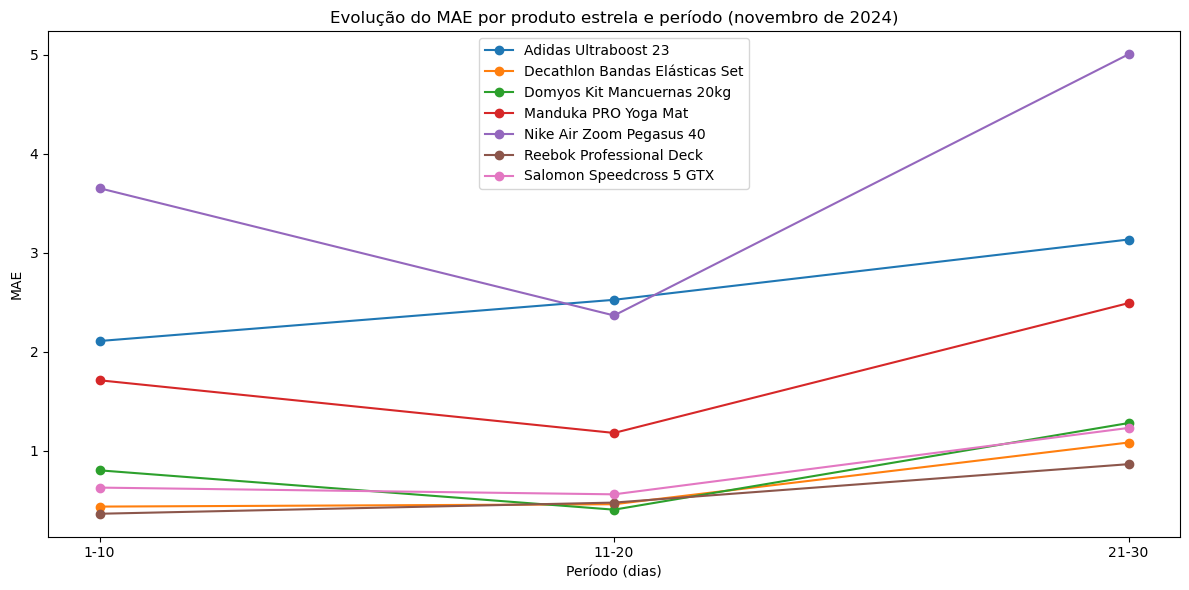

In [23]:
# Código: mostrar apenas o gráfico de evolução do MAE em períodos de 10 dias (novembro de 2024)
periodos = [(1, 10), (11, 20), (21, 30)]
metricas_periodo = []

for prod_id in produtos_top:
    dados = nov_2024[nov_2024['producto_id'] == prod_id].copy()
    nome = nomes_produtos.get(prod_id, f'Produto {prod_id}')
    for inicio, fim in periodos:
        dados_periodo = dados[(dados['fecha'].dt.day >= inicio) & (dados['fecha'].dt.day <= fim)]
        if not dados_periodo.empty:
            mae = mean_absolute_error(dados_periodo['unidades_vendidas'], dados_periodo['prediccion'])
        else:
            mae = np.nan
        metricas_periodo.append({'produto': nome, 'periodo': f'{inicio}-{fim}', 'mae': mae})

metricas_df = pd.DataFrame(metricas_periodo)
metricas_df = metricas_df.sort_values(['produto', 'periodo'])

plt.figure(figsize=(12,6))
for nome in metricas_df['produto'].unique():
    dados_prod = metricas_df[metricas_df['produto'] == nome]
    plt.plot(dados_prod['periodo'], dados_prod['mae'], marker='o', label=nome)
plt.title('Evolução do MAE por produto estrela e período (novembro de 2024)')
plt.xlabel('Período (dias)')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


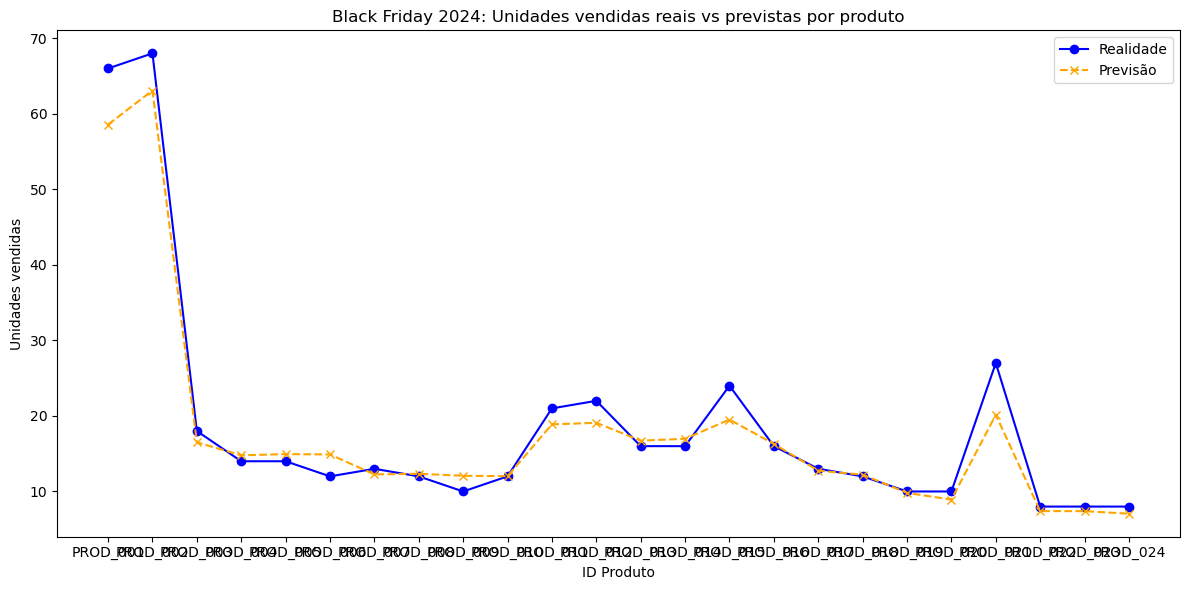

In [24]:
# 🤖 Análise específica da Black Friday 2024: comparação real vs previsão por produto
import matplotlib.pyplot as plt

# Identificar a data da Black Friday 2024 (última sexta-feira de novembro)
datas_nov = pd.date_range('2024-11-01', '2024-11-30')
black_friday_2024 = max([d for d in datas_nov if d.weekday() == 4])

# Filtrar dados da Black Friday
bf_df = nov_2024[nov_2024['fecha'] == black_friday_2024].copy()

# Preparar dados para o gráfico
ids = bf_df['producto_id'].tolist()
real = bf_df['unidades_vendidas'].tolist()
pred = bf_df['prediccion'].tolist()

plt.figure(figsize=(12,6))
plt.plot(ids, real, label='Realidade', marker='o', linestyle='-', color='blue')
plt.plot(ids, pred, label='Previsão', marker='x', linestyle='--', color='orange')
plt.title(f'Black Friday 2024: Unidades vendidas reais vs previstas por produto')
plt.xlabel('ID Produto')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# 🤖 Re-treinamento do modelo final usando todo o histórico (2021-2024)
from sklearn.ensemble import HistGradientBoostingRegressor

# Seleção de variáveis preditoras
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
excluir += list(df.select_dtypes(include=['object']).columns)
X_full = df.drop(columns=excluir)
y_full = df['unidades_vendidas']

# Treinar o modelo final
modelo_final = HistGradientBoostingRegressor(
    learning_rate=0.03,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
modelo_final.fit(X_full, y_full)

print('🤖 Modelo final treinado com todo o histórico (2021-2024)')

🤖 Modelo final treinado com todo o histórico (2021-2024)


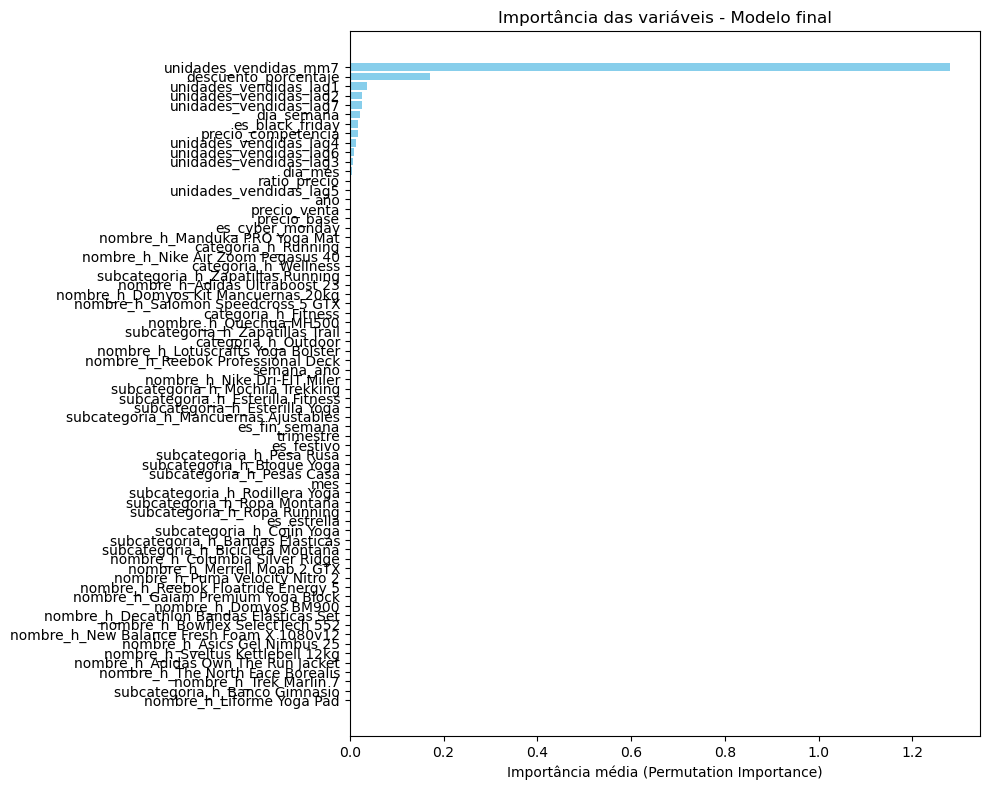

🤖 Modelo final salvo em ../models/modelo_final.joblib


In [26]:
# 🤖 Importância das variáveis com permutation importance e salvamento do modelo final
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# Calcular permutation importance
result = permutation_importance(modelo_final, X_full, y_full, n_repeats=10, random_state=42, n_jobs=-1)
importancias = result.importances_mean
features = X_full.columns

# Ordenar do maior para o menor
indices = importancias.argsort()[::-1]
features_sorted = features[indices]
importancias_sorted = importancias[indices]

# Gráfico de barras horizontais
plt.figure(figsize=(10,8))
plt.barh(features_sorted, importancias_sorted, color='skyblue')
plt.xlabel('Importância média (Permutation Importance)')
plt.title('Importância das variáveis - Modelo final')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Salvar o modelo final
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('🤖 Modelo final salvo em ../models/modelo_final.joblib')